In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
pd.get_option("display.max_columns")

20

## Load Data

In [2]:
path = '../data/raw'
articles = pd.read_csv(os.path.join(path,'articles.csv'))
customers = pd.read_csv(os.path.join(path,'customers.csv'))
transactions = pd.read_csv(os.path.join(path,'transactions_train.csv'))
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


### Reduce Memory Usage

The customer_id is a length 64 string which uses 64 bytes.<br> The code will coverts the column to int64 which only takes 8 bytes! Also the mapping is 1:1 

In [3]:
id_to_index_dict = dict(zip(customers["customer_id"], customers.index))
index_to_id_dict = dict(zip(customers.index, customers["customer_id"]))

# for memory efficiency
customers["customer_id"] = customers["customer_id"].map(id_to_index_dict)
transactions["customer_id"] = transactions["customer_id"].map(id_to_index_dict)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,1,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,3,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,4,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
### Convert other columns
transactions['price'] = transactions['price'].astype('float32')
transactions['sales_channel_id'] = transactions['sales_channel_id'].astype('int8')
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'],format = '%Y-%m-%d')
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       int64         
 2   article_id        int64         
 3   price             float32       
 4   sales_channel_id  int8          
dtypes: datetime64[ns](1), float32(1), int64(2), int8(1)
memory usage: 879.2 MB


## Data Quality 

To-Do (Data Quality)
- Define Column's Definition
- Check Null Columns
- Identify Categorical variables and its quality
- Plot Histogram for numericle variables (Check Normality)
- Find Outlier

### Check Missing values

#### Articles

In [5]:
articles.info()

# Check Missing Value in Each Column
count_null = pd.DataFrame(articles.isnull().sum(),columns=['null_items'])
count_null['null_ratio'] = count_null['null_items']/len(articles)
count_null[count_null.null_items > 0].T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

,detail_desc
null_items,416.000000
null_ratio,0.003942


#### Customers

In [6]:
customers.info()

# Check Missing Value in Each Column
count_null = pd.DataFrame(customers.isnull().sum(),columns=['null_items'])
count_null['null_ratio'] = count_null['null_items']/len(customers)
count_null[count_null.null_items > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  int64  
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ MB


,null_items,null_ratio
FN,895050,0.652378
Active,907576,0.661508
club_member_status,6062,0.004418
fashion_news_frequency,16009,0.011669
age,15861,0.011561


#### Transactions

In [7]:
transactions.info()

# Check Missing Value in Each Column
count_null = pd.DataFrame(transactions.isnull().sum(),columns=['null_items'])
count_null['null_ratio'] = count_null['null_items']/len(transactions)
count_null[count_null.null_items > 0].T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       int64         
 2   article_id        int64         
 3   price             float32       
 4   sales_channel_id  int8          
dtypes: datetime64[ns](1), float32(1), int64(2), int8(1)
memory usage: 879.2 MB


""
null_items
null_ratio


### Explore Missing Values

Only "customer.csv" has missing value problems in the following columns:
- [FN]
- [Active]
- [club_member_status]
- [fashion_news_frequency]
- [age]

In [8]:
print('row percentage of missing value is {} %'.format(len(customers[customers.isnull().any(axis=1)])*100/customers.shape[0]))

# Check Missing Value in Each Column
count_null = pd.DataFrame(customers.isnull().sum(),columns=['null_items'])
count_null['null_ratio'] = count_null['null_items']/len(customers)
count_null[count_null.null_items > 0].T

row percentage of missing value is 66.25963935334335 %


,FN,Active,club_member_status,fashion_news_frequency,age
null_items,895050.000000,907576.000000,6062.000000,16009.000000,15861.000000
null_ratio,0.652378,0.661508,0.004418,0.011669,0.011561


#### FN

In [9]:
pd.DataFrame(customers[['FN']].value_counts(dropna=False))

,0
FN,
NaN,895050
1.0,476930


#### Active

In [10]:
pd.DataFrame(customers[['Active']].value_counts(dropna=False))

,0
Active,
NaN,907576
1.0,464404


#### club_member_status

In [11]:
pd.DataFrame(customers[['club_member_status']].value_counts(dropna=False))

,0
club_member_status,
ACTIVE,1272491
PRE-CREATE,92960
NaN,6062
LEFT CLUB,467


#### fashion_news_frequency

In [12]:
pd.DataFrame(customers[['fashion_news_frequency']].value_counts(dropna=False))

,0
fashion_news_frequency,
NONE,877711
Regularly,477416
NaN,16009
Monthly,842
None,2


In [13]:
pd.DataFrame(customers[['Active','club_member_status']].value_counts(dropna=False))

0
Active club_member_status        
NaN    ACTIVE              814039
1.0    ACTIVE              458452
NaN    PRE-CREATE           87329
       NaN                   5744
1.0    PRE-CREATE            5631
NaN    LEFT CLUB              464
1.0    NaN                    318
       LEFT CLUB                3

#### age

<AxesSubplot:>

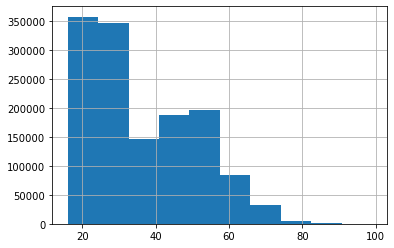

In [14]:
customers['age'].hist()

In [15]:
customers[['age']].describe().astype(str).T

,count,mean,std,min,25%,50%,75%,max
age,1356119.0,36.386964565794,14.313627981635868,16.0,24.0,32.0,49.0,99.0


In [16]:
temp = customers.copy()
temp['age_bin'] = pd.cut(temp['age'],bins=[min(temp['age']),35,60,80,max(temp['age'])])

pd.DataFrame(temp['age_bin'].value_counts(dropna=False)).reset_index()

,index,age_bin
0,"(16.0, 35.0]",770187
1,"(35.0, 60.0]",506555
2,"(60.0, 80.0]",78104
3,NaN,16022
4,"(80.0, 99.0]",1112


#### Cremer's V Test

In [17]:
for i in [ i for i in customers.columns if customers[i].isnull().any()]:
    temp[i+'_m'] = np.where(temp[i].isnull(),True,False)
    
# Convert boolean to categary for Cremer's V Calculation    
temp = temp.apply(lambda x: x.astype("category") if x.dtype == "bool" else x)

temp.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin,FN_m,Active_m,club_member_status_m,fashion_news_frequency_m,age_m
0,0,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,"(35.0, 60.0]",True,True,False,False,False
1,1,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,"(16.0, 35.0]",True,True,False,False,False
2,2,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,"(16.0, 35.0]",True,True,False,False,False
3,3,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,"(35.0, 60.0]",True,True,False,False,False
4,4,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,"(35.0, 60.0]",False,False,False,False,False


In [18]:
temp[['FN','Active']]  = temp[['FN','Active']].fillna(0)
temp[['FN','Active','club_member_status','fashion_news_frequency']] = temp[['FN','Active','club_member_status','fashion_news_frequency']].astype('category')

In [19]:
import association_metrics as am
# Initialize a Cramer V object
cramersv = am.CramersV(temp)

In [20]:
cramersv.fit()[['FN_m','Active_m','club_member_status_m','fashion_news_frequency_m','age_m']][:5]


C:\Users\praka\Anaconda3\lib\site-packages\association_metrics\categorical.py:78: RuntimeWarning: invalid value encountered in double_scalars
  v = sqrt((chi2/n)/mindim)


,FN_m,Active_m,club_member_status_m,fashion_news_frequency_m,age_m
FN,1.000000,0.979947,0.041222,0.079316,0.061562
Active,0.979947,1.000000,0.040269,0.077725,0.060430
club_member_status,0.163185,0.159891,NaN,0.031766,0.187914
fashion_news_frequency,0.995303,0.976099,0.031247,NaN,0.055782
age_bin,0.045704,0.047257,0.010558,0.010140,NaN


In [21]:
customers.fillna(0).groupby(['FN','Active','fashion_news_frequency']).count()

customer_id  club_member_status     age  \
FN  Active fashion_news_frequency                                            
0.0 0.0    0                             16009               16009   16009   
           Monthly                          13                  13      13   
           NONE                         876922              876922  876922   
           Regularly                      2106                2106    2106   
1.0 0.0    Monthly                          31                  31      31   
           NONE                            290                 290     290   
           None                              1                   1       1   
           Regularly                     12204               12204   12204   
    1.0    Monthly                         798                 798     798   
           NONE                            499                 499     499   
           None                              1                   1       1   
           Regularly                    463106              463106  463106   

                                   postal_code  
FN  Active fashion_news_frequency               
0.0 0.0    0                             16009  
           Monthly                          13  
           NONE                         876922  
           Regularly                      2106  
1.0 0.0    Monthly                          31  
           NONE                            290  
           None                              1  
           Regularly                     12204  
    1.0    Monthly                         798  
           NONE                            499  
           None                              1  
           Regularly                    463106

In [22]:
temp.groupby(['FN_m','fashion_news_frequency']).count()

customer_id      FN  Active  club_member_status  \
FN_m  fashion_news_frequency                                                    
False Monthly                         829     829     829                 824   
      NONE                            789     789     789                 783   
      None                              2       2       2                   2   
      Regularly                    475310  475310  475310              475000   
True  Monthly                          13      13      13                  13   
      NONE                         876922  876922  876922              873223   
      None                              0       0       0                   0   
      Regularly                      2106    2106    2106                2099   

                                 age  postal_code  age_bin  Active_m  \
FN_m  fashion_news_frequency                                           
False Monthly                    828          829      828       829   
      NONE                       781          789      781       789   
      None                         2            2        2         2   
      Regularly               474105       475310   474031    475310   
True  Monthly                     13           13       13        13   
      NONE                    864489       876922   864403    876922   
      None                         0            0        0         0   
      Regularly                 2106         2106     2105      2106   

                              club_member_status_m  fashion_news_frequency_m  \
FN_m  fashion_news_frequency                                                   
False Monthly                                  829                       829   
      NONE                                     789                       789   
      None                                       2                         2   
      Regularly                             475310                    475310   
True  Monthly                                   13                        13   
      NONE                                  876922                    876922   
      None                                       0                         0   
      Regularly                               2106                      2106   

                               age_m  
FN_m  fashion_news_frequency          
False Monthly                    829  
      NONE                       789  
      None                         2  
      Regularly               475310  
True  Monthly                     13  
      NONE                    876922  
      None                         0  
      Regularly                 2106

In [23]:
temp.groupby(['Active_m','fashion_news_frequency']).count()

customer_id      FN  Active  \
Active_m fashion_news_frequency                                
False    Monthly                         798     798     798   
         NONE                            499     499     499   
         None                              1       1       1   
         Regularly                    463106  463106  463106   
True     Monthly                          44      44      44   
         NONE                         877212  877212  877212   
         None                              1       1       1   
         Regularly                     14310   14310   14310   

                                 club_member_status     age  postal_code  \
Active_m fashion_news_frequency                                            
False    Monthly                                793     797          798   
         NONE                                   493     495          499   
         None                                     1       1            1   
         Regularly                           462799  461936       463106   
True     Monthly                                 44      44           44   
         NONE                                873513  864775       877212   
         None                                     1       1            1   
         Regularly                            14300   14275        14310   

                                 age_bin    FN_m  club_member_status_m  \
Active_m fashion_news_frequency                                          
False    Monthly                     797     798                   798   
         NONE                        495     499                   499   
         None                          1       1                     1   
         Regularly                461863  463106                463106   
True     Monthly                      44      44                    44   
         NONE                     864689  877212                877212   
         None                          1       1                     1   
         Regularly                 14273   14310                 14310   

                                 fashion_news_frequency_m   age_m  
Active_m fashion_news_frequency                                    
False    Monthly                                      798     798  
         NONE                                         499     499  
         None                                           1       1  
         Regularly                                 463106  463106  
True     Monthly                                       44      44  
         NONE                                      877212  877212  
         None                                           1       1  
         Regularly                                  14310   14310

In [24]:
temp.groupby(['age_m','club_member_status']).count()

customer_id       FN   Active  \
age_m club_member_status                                  
False ACTIVE                  1266255  1266255  1266255   
      LEFT CLUB                   464      464      464   
      PRE-CREATE                85624    85624    85624   
True  ACTIVE                     6236     6236     6236   
      LEFT CLUB                     3        3        3   
      PRE-CREATE                 7336     7336     7336   

                          fashion_news_frequency      age  postal_code  \
age_m club_member_status                                                 
False ACTIVE                             1254398  1266255      1266255   
      LEFT CLUB                              464      464          464   
      PRE-CREATE                           83708    85624        85624   
True  ACTIVE                                6168        0         6236   
      LEFT CLUB                                3        0            3   
      PRE-CREATE                            7203        0         7336   

                          age_bin     FN_m  Active_m  club_member_status_m  \
age_m club_member_status                                                     
False ACTIVE              1266099  1266255   1266255               1266255   
      LEFT CLUB               464      464       464                   464   
      PRE-CREATE            85621    85624     85624                 85624   
True  ACTIVE                    0     6236      6236                  6236   
      LEFT CLUB                 0        3         3                     3   
      PRE-CREATE                0     7336      7336                  7336   

                          fashion_news_frequency_m  
age_m club_member_status                            
False ACTIVE                               1266255  
      LEFT CLUB                                464  
      PRE-CREATE                             85624  
True  ACTIVE                                  6236  
      LEFT CLUB                                  3  
      PRE-CREATE                              7336

### Detect Outlier

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax0.boxplot(transactions['price'],labels=['Price'])
ax1.hist(transactions['price'][transactions['price']<=0.3],bins=30)

plt.show()
pd.DataFrame(transactions['price'].describe()).astype(float).T

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax0.boxplot(customers['age'],labels=['age'])
ax1.hist(customers['age'],bins=30)

plt.show()
pd.DataFrame(customers['age'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])).T

### Merge Problem

#### Unsold articles

In [25]:
temp = transactions.merge(articles,on='article_id',how='outer',indicator=True)
print('Total unsold articles: ',len(temp[temp._merge == 'right_only']))
temp[temp._merge == 'right_only'].head(2)

Total unsold articles:  995


,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,_merge
31788324,NaT,NaN,187949032,NaN,NaN,187949,Padded pyjama,295,Pyjama jumpsuit/playsuit,Nightwear,...,G,Baby Sizes 50-98,4,Baby/Children,44,Baby Essentials & Complements,1017,"Under-, Nightwear",Lightly padded all-in-one pyjamas in soft cott...,right_only
31788325,NaT,NaN,288859020,NaN,NaN,288859,Kakan 2-p cableknit BG,304,Underwear Tights,Socks & Tights,...,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1021,Socks and Tights,"Tights in a soft, cable-knit cotton blend with...",right_only


#### Cold Start customers (Zero transaction)

In [26]:
zero_tran_cus = customers.merge(transactions,on='customer_id',how='outer',indicator=True)
print('Total zero-transaction customers: ',len(zero_tran_cus[zero_tran_cus._merge == 'left_only']))
zero_tran_cus = zero_tran_cus[zero_tran_cus._merge == 'left_only']
zero_tran_cus.head()

Total zero-transaction customers:  9699


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id,_merge
3094,131,NaN,NaN,ACTIVE,NONE,21.0,1e40bebdc7cbfcb0f0ee995f5e0db13428430874a75c4b...,NaT,NaN,NaN,NaN,left_only
6840,297,1.0,1.0,ACTIVE,Regularly,22.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,NaT,NaN,NaN,NaN,left_only
11979,544,NaN,NaN,ACTIVE,NONE,28.0,0e78861d5ef1caf30cd0c4935cff27657c069c1f2fd2ba...,NaT,NaN,NaN,NaN,left_only
14349,671,1.0,1.0,ACTIVE,Regularly,27.0,d61345e04372ca317ac03dc220889f26a99b4eb20fbf60...,NaT,NaN,NaN,NaN,left_only
17374,809,1.0,1.0,ACTIVE,Regularly,41.0,4812c1daacee854264500f67aef71d1e713dca9b4755d7...,NaT,NaN,NaN,NaN,left_only


<b>Note: </b>I suggest that we should remove these clients from our modelling process because we don't have their detail much.

## Data Transformation
Only customer.csv that should be fixed due to its missing data.

#### Remove zero-transaction customers.


In [27]:
# print('Total Records (Before): ',len(customers))
# customers = customers[~customers['customer_id'].isin(zero_tran_cus['customer_id'])].reset_index(drop=True)
# print('Total Records (After): ',len(customers))


Total Records (Before):  1371980
Total Records (After):  1362281


#### Impute null values for each column.

In [28]:
customers[['FN','Active']] = customers[['FN','Active']].fillna(0.0)
customers[['age']] = customers[['age']].fillna(customers.age.median())
customers[['club_member_status']] = customers[['club_member_status']].fillna('OTHER')
customers[['fashion_news_frequency']] = customers[['fashion_news_frequency']].fillna('NONE')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].apply(lambda x: 'NONE' if x == 'None' else x)
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,1,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,2,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,3,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,4,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


#### Join table

In [52]:
temp = transactions.merge(customers,how='left',on='customer_id')
temp.drop(columns=['postal_code'],inplace=True)
temp = temp.merge(articles.select_dtypes(include=['int64']),how='left',on='article_id')
for i in temp.select_dtypes(include=['float64']).columns:
    temp[i] = temp[i].astype('float32')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788324 entries, 0 to 31788323
Data columns (total 20 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   t_dat                       datetime64[ns]
 1   customer_id                 int64         
 2   article_id                  int64         
 3   price                       float32       
 4   sales_channel_id            int8          
 5   FN                          float32       
 6   Active                      float32       
 7   club_member_status          object        
 8   fashion_news_frequency      object        
 9   age                         float32       
 10  product_code                int64         
 11  product_type_no             int64         
 12  graphical_appearance_no     int64         
 13  colour_group_code           int64         
 14  perceived_colour_value_id   int64         
 15  perceived_colour_master_id  int64         
 16  department_no   

## Save processed data

In [53]:
import pickle
# mapping index
path = '../data/processed'

# Save index for customer_id
with open(os.path.join(path,'cusId_to_index.pkl'), 'wb') as f:
    pickle.dump(id_to_index_dict, f)
    
with open(os.path.join(path,'index_to_cusId.pkl'), 'wb') as f:
    pickle.dump(index_to_id_dict, f)    

customers.to_pickle(os.path.join(path,'customers.pkl'))
transactions.to_pickle(os.path.join(path,'transactions.pkl'))
temp.to_pickle(os.path.join(path,'merged_data.pkl'))